## This adds the modules folder to the system directory such that files inside modules can be imported.

In [ ]:
%run modules/helpers.py
import helpers as h

In [ ]:
import modules.helpers
import matplotlib.pylab as plt
import importlib
import sys

importlib.reload(modules.helpers)

plt.style.use(['seaborn-paper','style/science'])

%config InlineBackend.figure_format = 'svg' # png, retina also are available

### This function converts all the files inside the data folder by saving them to './converted/<filename>.csv'

### Calibration run with two voltages

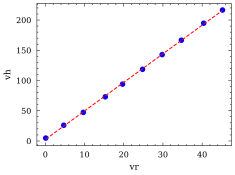

In [ ]:
import pandas as pd


from scipy.optimize import curve_fit 
import numpy as np

df1 = pd.read_csv('data/calibration/calibration.csv');

plt.close()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot('vr','vh', 'bo',data=df1) # easier plotting

# plt.plot(df1['vr'],df1['vh'], 'bo')
ax.set_xlabel('vr'); ax.set_ylabel('vh')

f = lambda x,a,b: a*x + b
fit, cov = curve_fit(f, df1['vr'],df1['vh'])
x_fit = np.linspace(df1['vr'].min(), df1['vr'].max(),3)
y_fit = f(x_fit, *fit)
ax.plot(x_fit,y_fit,'r--')
fig.show()

### Calibrating the Hall sensor based on data given by Saverio

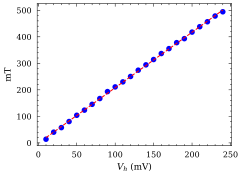

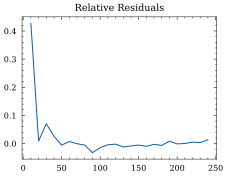

In [ ]:
df =pd.read_csv('data/calibration/hr66_calibration.csv')
plt.plot('vh','b','bo',data= df) ## the hall voltages are in milivolts
fit, cov = curve_fit(f,df['vh'],df['b'])
y_fit = f(df['vh'],*fit)
plt.plot(df['vh'],y_fit,'r--'); plt.xlabel('$V_{h}$ (mV)'); plt.ylabel('mT')
S_res = (y_fit - df['b'])/df['b']
plt.show()
plt.close()
plt.plot(df['vh'],S_res); plt.title('Relative Residuals')
plt.show()

In [ ]:
np.save('output_data/calibration/hall_sensor_fit',fit,allow_pickle=True)
np.save('output_data/calibration/hall_sensor_cov',cov, allow_pickle=True)

### Now you can import calibration.HallCalibrate, create an instance of that class via HallCalibrate(), the brackets must be added. Call HallCalibrate.convert function on a list of mV Hall voltages to convert that to the field strength.


#### To update the calibration class, re-run this notebook.

In [ ]:
from calibration import HallCalibrate
convert = HallCalibrate().convert
val = df['vh'].apply(convert)

In [ ]:
calibration_path = h.get_file_path('calibration')
h.convert_column(calibration_path,'vh','b_mT')

data/calibration/hr66_calibration.csv
data/calibration/calibration.csv
data/calibration/converted/calibration.csv


KeyboardInterrupt: Interrupted by user

In [ ]:
h.list_files('data')

data/
    calibration/
        HR66.HEIC
        HR66_curve.HEIC
        hr66_calibration.csv
        calibration.csv
        converted/
            calibration.csv


In [ ]:
print(fit)

[ 2.09135217 -1.07318841]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ecbd92d-6b4a-45b7-a31d-2b1feb49da8f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>